Load Necessary Libraries, matlab file and B0005 battery dataset.

In [2]:
import scipy.io
import csv
import matplotlib.pyplot as plt
import pandas as pd

mat_data = scipy.io.loadmat('B0005.mat')

data = mat_data['B0005']

Extract the capacity values for Discharge cycles and store in a csv and plot Capacity vs Index

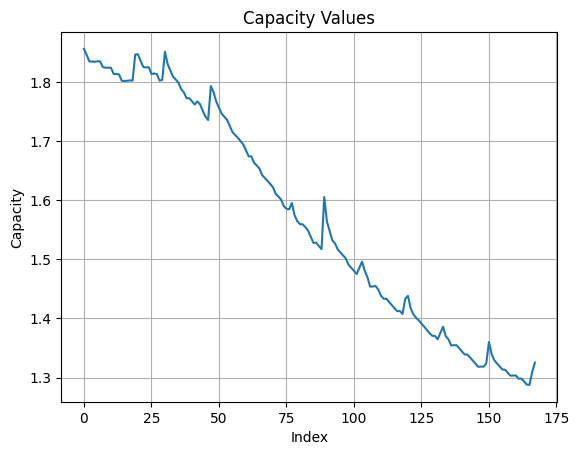

In [3]:
file=open("Data.csv",'w',newline='')
writer=csv.writer(file)
writer.writerow(['Cycle No.','Cycle Type','Capacity'])

i=1
for row in data[0][0][0][0]:
    if(row[0]==['discharge']):
        writer.writerow([i,row[0][0],row[-1][-1][-1][-1][0][0]])
        i+=1
file.close()
capacity_df = pd.read_csv("Data.csv")

df=pd.read_csv("Data.csv")
plt.plot(df['Capacity'])
plt.title('Capacity Values')
plt.xlabel('Index')
plt.ylabel('Capacity')
plt.grid(True)
plt.show()


Extract voltage and time for specific discharge cycles and plot graph.

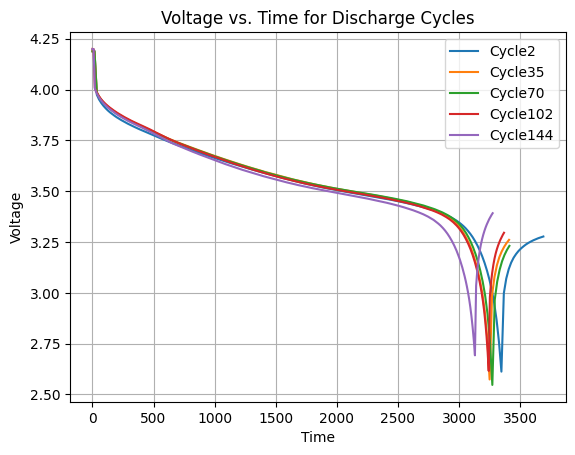

In [4]:
cycles=[1,34,69,101,143]
for cycle in cycles:
    time=list(data[0][0][0][0][cycle][3][0][0][5][0])
    voltage1=list(data[0][0][0][0][cycle][3][0][0][0][0])
    plt.plot(time, voltage1,label=f'Cycle{cycle+1}')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage vs. Time for Discharge Cycles')
plt.legend()
plt.grid(True)
plt.show()



Extract voltage and time for specific charge cycles and plot graph.

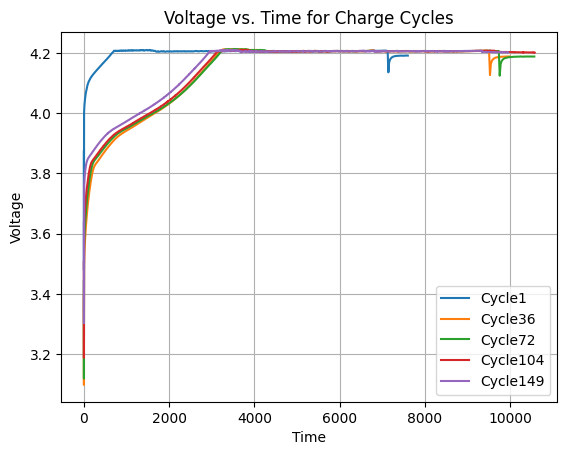

In [5]:
cycles=[0,35,71,103,148]
for cycle in cycles:
    time=data[0][0][0][0][cycle][3][0][0][5][0]
    voltage1=data[0][0][0][0][cycle][3][0][0][0][0]
    df=pd.DataFrame(time,voltage1)
    df.to_excel("VOLCurr.xlsx")
    plt.plot(time, voltage1,label=f'Cycle{cycle+1}')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Voltage vs. Time for Charge Cycles')
plt.legend()
plt.grid(True)
plt.show()

Extract Temperature and time for specific discharge cycles and plot graph.

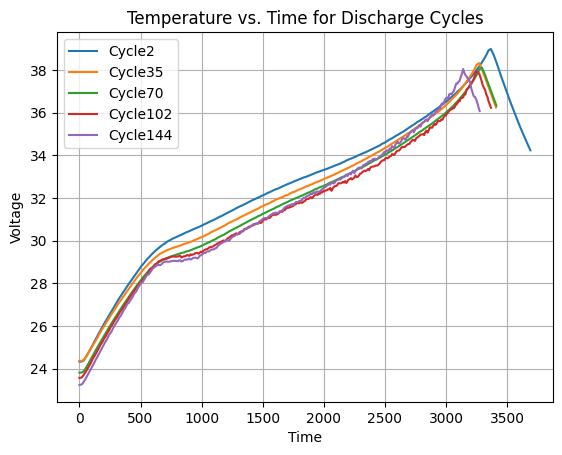

In [6]:
cycles=[1,34,69,101,143]
for cycle in cycles:
    time=data[0][0][0][0][cycle][3][0][0][5][0]
    temp=data[0][0][0][0][cycle][3][0][0][2][0]
    plt.plot(time, temp,label=f'Cycle{cycle+1}')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Temperature vs. Time for Discharge Cycles')
plt.legend()
plt.grid(True)
plt.show()

Extract Temperature and time for specific charge cycles and plot graph.

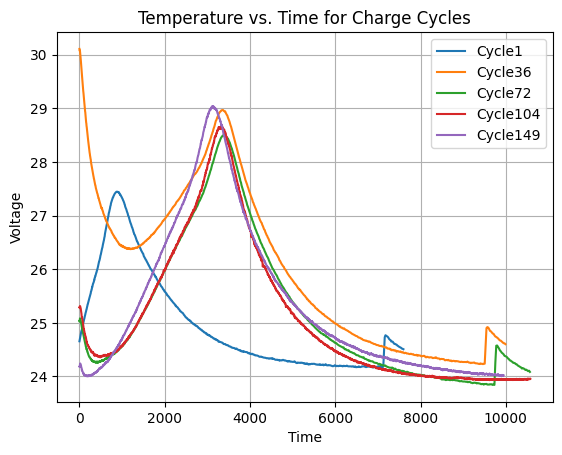

In [7]:
cycles=[0,35,71,103,148]
for cycle in cycles:
    time=data[0][0][0][0][cycle][3][0][0][5][0]
    temp=data[0][0][0][0][cycle][3][0][0][2][0]
    plt.plot(time, temp,label=f'Cycle{cycle+1}')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Temperature vs. Time for Charge Cycles')
plt.legend()
plt.grid(True)
plt.show()

Extract Current and time for specific discharge cycles and plot graph.

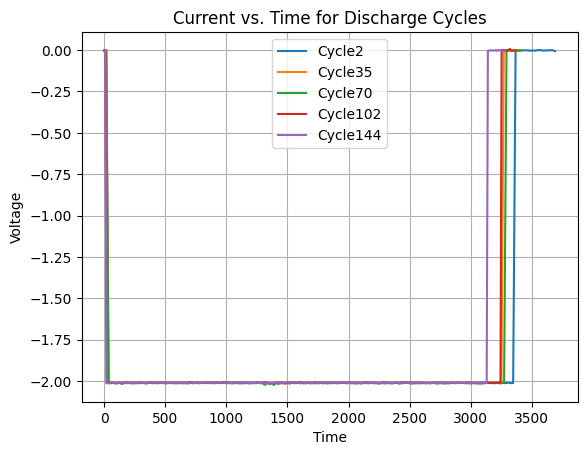

In [8]:
cycles=[1,34,69,101,143]
for cycle in cycles:
    time=data[0][0][0][0][cycle][3][0][0][5][0]
    temp=data[0][0][0][0][cycle][3][0][0][1][0]
    plt.plot(time, temp,label=f'Cycle{cycle+1}')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Current vs. Time for Discharge Cycles')
plt.legend()
plt.grid(True)
plt.show()

Extract Current and time for specific charge cycles and plot graph.

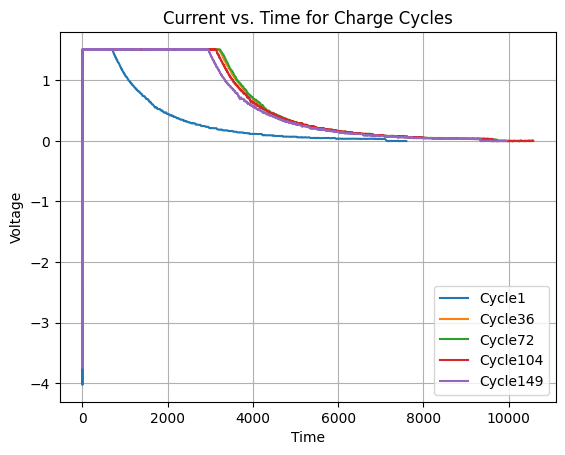

In [9]:
cycles=[0,35,71,103,148]
for cycle in cycles:
    time=data[0][0][0][0][cycle][3][0][0][5][0]
    charge=data[0][0][0][0][cycle][3][0][0][1][0]
    plt.plot(time, charge,label=f'Cycle{cycle+1}')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Current vs. Time for Charge Cycles')
plt.legend()
plt.grid(True)
plt.show()

Indirect Health Indicator
    1. TEVD - The time interval of equal voltage decrease
The three-step HI extraction framework is as follows:
Step 1.
Extract the monitoring voltage, current, and cycle index in each charging/discharging cycle under the constant-voltage and restricted-current mode;
Step 2.
Define the discharging voltage interval (Vmax and Vmin) and extract the health indicating time series. Here, Vmax (Vmin) is the maximum (minimum) voltage value used as the starting (ending) signal to count the number of discharging time intervals. Thus, the time interval corresponding to discharging voltage between Vmax and Vmin can be obtained as shown in Equation (1);
Step 3.
Convert the time interval difference corresponding to the Vmax − Vmin, to obtain the TIEDVD series in each cycle as shown in Equation (2).

The TEVD values are extracted and stored in a dataframe.

In [10]:
vmax=3.75
vmin=3.50
i=1
ihi_df=pd.DataFrame()
# voltage_df=pd.DataFrame()
for row in data[0][0][0][0]:
    if(row[0]==['discharge']):
        voltage1=list(row[3][0][0][0][0])
        time=list(row[3][0][0][5][0])
        maxIndex = voltage1.index(min(voltage1, key=lambda x: abs(x - vmax)))
        minIndex= voltage1.index(min(voltage1, key=lambda x: abs(x - vmin)))
        ihi_df.loc[i,'HI1']=time[minIndex]-time[maxIndex]
        i+=1
# print(voltage_df)
ihi_df

,HI1
1,1440.250
2,1478.938
3,1498.547
4,1480.891
5,1479.906
...,...
164,693.250
165,693.093
166,692.875
167,721.422


the charge voltage varying from 3.9 V to the voltage after 500 seconds is used as HI2

In [11]:
vmax=3.9
target_time=500
i=1
for row in data[0][0][0][0]:
    if(row[0]==['charge']):
        voltage1=list(row[3][0][0][0][0])
        time=list(row[3][0][0][5][0])
        closest_index = min(range(len(time)), key=lambda i: abs(time[i] - target_time) if time[i] - target_time >=0 else target_time)
        ihi_df.loc[i,['HI2','Voltage after 500s']]=[abs(3.75-voltage1[closest_index]),voltage1[closest_index]]
        i+=1
ihi_df

,HI1,HI2,Voltage after 500s
1,1440.250,0.423599,4.173599
2,1478.938,0.129952,3.879952
3,1498.547,0.127601,3.877601
4,1480.891,0.128578,3.878578
5,1479.906,0.126600,3.876600
...,...,...,...
166,692.875,0.272063,4.022063
167,721.422,0.272765,4.022765
168,721.390,0.272489,4.022489
169,NaN,0.273947,4.023947


In [12]:
target_time=1000
i=1
# ihi_df=pd.DataFrame()
for row in data[0][0][0][0]:
    if(row[0]==['charge']):
        time=list(row[3][0][0][5][0])
        current=list(row[3][0][0][1][0])
        closest_index = min(range(len(time)), key=lambda i: abs(time[i] - target_time) if time[i] - target_time >=0 else target_time)
        ihi_df.loc[i,['HI3','Current after 1000s']]=[abs(1.5-current[closest_index]),current[closest_index]]
        i+=1
ihi_df

,HI1,HI2,Voltage after 500s,HI3,Current after 1000s
1,1440.250,0.423599,4.173599,0.423655,1.076345
2,1478.938,0.129952,3.879952,0.011512,1.511512
3,1498.547,0.127601,3.877601,0.009911,1.509911
4,1480.891,0.128578,3.878578,0.011501,1.511501
5,1479.906,0.126600,3.876600,0.009363,1.509363
...,...,...,...,...,...
166,692.875,0.272063,4.022063,0.011587,1.511587
167,721.422,0.272765,4.022765,0.008122,1.508122
168,721.390,0.272489,4.022489,0.008794,1.508794
169,NaN,0.273947,4.023947,0.010731,1.510731


In [13]:
vmin=3.9
vmax=4.2
i=1
for row in data[0][0][0][0]:
    if(row[0]==['charge']):
        voltage1=list(row[3][0][0][0][0])
        time=list(row[3][0][0][5][0])
        minIndex= voltage1.index(min(voltage1, key=lambda x: abs(x - vmin)))
        maxIndex = voltage1.index(min(voltage1, key=lambda x: abs(x - vmax)))
        ihi_df.loc[i,['HI4','Time 3.9','Time 4.2']]=[time[maxIndex]-time[minIndex],time[minIndex],time[maxIndex]]
        i+=1
ihi_df

,HI1,HI2,Voltage after 500s,HI3,Current after 1000s,HI4,Time 3.9,Time 4.2
1,1440.250,0.423599,4.173599,0.423655,1.076345,663.172,0.000,663.172
2,1478.938,0.129952,3.879952,0.011512,1.511512,2627.125,614.672,3241.797
3,1498.547,0.127601,3.877601,0.009911,1.509911,2610.750,627.969,3238.719
4,1480.891,0.128578,3.878578,0.011501,1.511501,2590.297,627.515,3217.812
5,1479.906,0.126600,3.876600,0.009363,1.509363,2591.812,636.406,3228.218
...,...,...,...,...,...,...,...,...
166,692.875,0.272063,4.022063,0.011587,1.511587,1484.484,60.078,1544.562
167,721.422,0.272765,4.022765,0.008122,1.508122,1479.234,57.672,1536.906
168,721.390,0.272489,4.022489,0.008794,1.508794,1472.422,60.250,1532.672
169,NaN,0.273947,4.023947,0.010731,1.510731,10162.109,50.125,10212.234


In [14]:
def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    return 0.5 + 0.5 * (column - min_val) / (max_val - min_val)

ihi_df[['HI1','HI2','HI3','HI4']] = ihi_df[['HI1','HI2','HI3','HI4']].apply(min_max_normalize)
ihi_df1=ihi_df[['HI1','HI2','HI3','HI4']]
ihi_df1


,HI1,HI2,HI3,HI4
1,0.694374,0.544444,0.639352,0.531007
2,0.704436,0.501153,0.501702,0.622834
3,0.709536,0.500806,0.501168,0.622068
4,0.704944,0.500950,0.501698,0.621112
5,0.704688,0.500659,0.500984,0.621182
...,...,...,...,...
166,0.500000,0.522104,0.501727,0.569408
167,0.507424,0.522207,0.500570,0.569163
168,0.507416,0.522167,0.500794,0.568844
169,NaN,0.522381,0.501441,0.975138


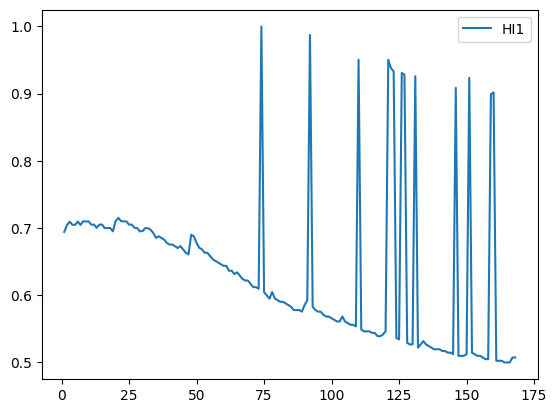

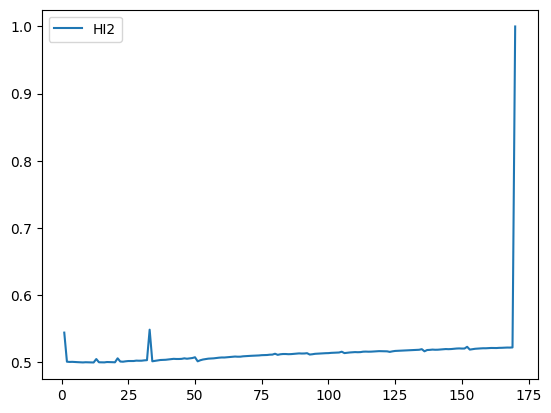

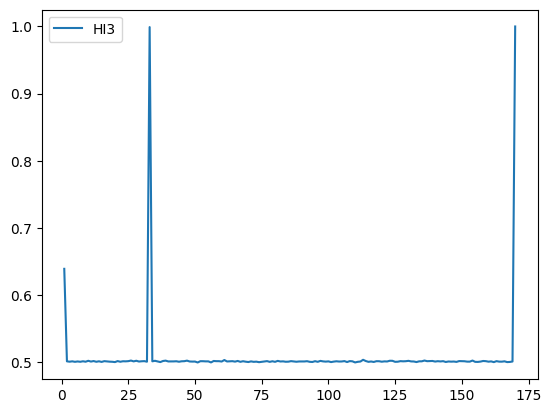

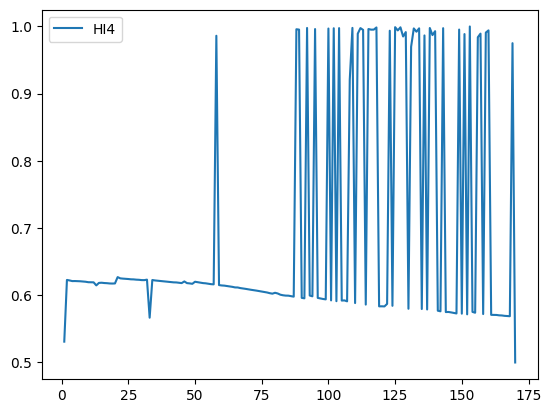

In [15]:
for col in ihi_df1:
    plt.plot(ihi_df.index, ihi_df[col], label=col)
    plt.legend()
    plt.show()

In [16]:
ihi_df

,HI1,HI2,Voltage after 500s,HI3,Current after 1000s,HI4,Time 3.9,Time 4.2
1,0.694374,0.544444,4.173599,0.639352,1.076345,0.531007,0.000,663.172
2,0.704436,0.501153,3.879952,0.501702,1.511512,0.622834,614.672,3241.797
3,0.709536,0.500806,3.877601,0.501168,1.509911,0.622068,627.969,3238.719
4,0.704944,0.500950,3.878578,0.501698,1.511501,0.621112,627.515,3217.812
5,0.704688,0.500659,3.876600,0.500984,1.509363,0.621182,636.406,3228.218
...,...,...,...,...,...,...,...,...
166,0.500000,0.522104,4.022063,0.501727,1.511587,0.569408,60.078,1544.562
167,0.507424,0.522207,4.022765,0.500570,1.508122,0.569163,57.672,1536.906
168,0.507416,0.522167,4.022489,0.500794,1.508794,0.568844,60.250,1532.672
169,NaN,0.522381,4.023947,0.501441,1.510731,0.975138,50.125,10212.234


Outlier removal

In [17]:
ihi_df=ihi_df.loc[ihi_df['HI1']<0.89]

In [18]:
q1=ihi_df['HI2'].quantile(0.25)
q3=ihi_df['HI2'].quantile(0.75)
iqr=q3-q1
print(iqr)
lower_bound=q1-(1.5 * iqr)
upper_bound=q3+(1.5 * iqr)
print(lower_bound,upper_bound)
ihi_df = ihi_df.loc[(ihi_df['HI2'] > lower_bound) & (ihi_df['HI2'] < upper_bound)]

0.012106900981125879
0.48655891740754287 0.5349865213320464


In [19]:
q1=ihi_df['HI3'].quantile(0.25)
q3=ihi_df['HI3'].quantile(0.75)
iqr=q3-q1
print(iqr)
lower_bound=q1-(1.5 * iqr)
upper_bound=q3+(1.5 * iqr)
print(lower_bound,upper_bound)
ihi_df = ihi_df.loc[(ihi_df['HI3'] > lower_bound) & (ihi_df['HI3'] < upper_bound)]

0.0007605001133617062
0.500013984131391 0.5030559845848378


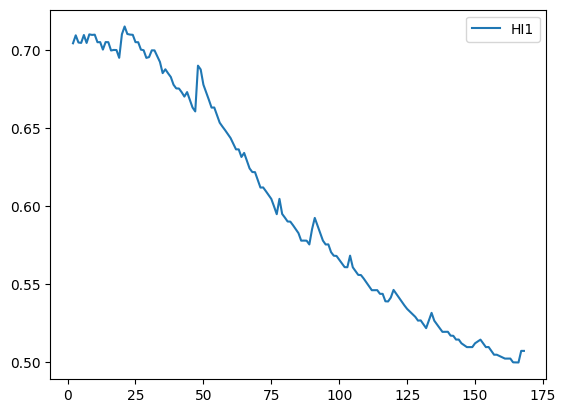

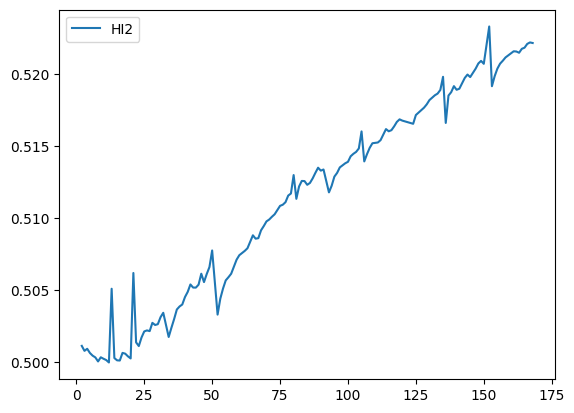

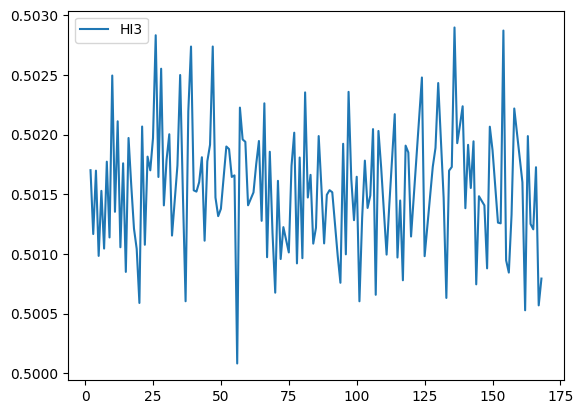

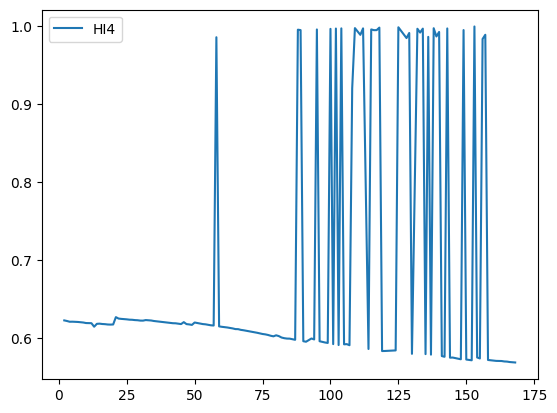

In [20]:
import numpy as np
for col in ihi_df1:
    plt.plot(ihi_df.index, ihi_df[col], label=col)
    plt.legend()
    plt.show()

In [21]:
ihi_df1.to_excel("IHIs.xlsx",index=False)

In [22]:
capacity_df=pd.read_csv("Data.csv")
ihi_df=ihi_df.iloc[:len(capacity_df)]
capacity_df=capacity_df.iloc[:len(ihi_df)]


In [23]:
print("Size of Capacity:",len(capacity_df))
print("Size of IHIs:",len(ihi_df))

Size of Capacity: 150
Size of IHIs: 150


Calculation of Pearson Correlation Coefficient & Spearman Correlation Coefficient

In [24]:
import scipy.stats
import pandas as pd

correlation_coefficients_pearson = {}
p_values_pearson = {}
correlation_coefficients_spearman = {}
p_values_spearman = {}

hi_columns = ['HI1', 'HI2', 'HI3', 'HI4']

for hi_column in hi_columns:
    # Pearson correlation
    corr_coeff_pearson, p_value_pearson = scipy.stats.pearsonr(ihi_df[hi_column], capacity_df['Capacity'])
    correlation_coefficients_pearson[hi_column] = corr_coeff_pearson
    p_values_pearson[hi_column] = p_value_pearson

    # Spearman correlation
    corr_coeff_spearman, p_value_spearman = scipy.stats.spearmanr(ihi_df[hi_column], capacity_df['Capacity'])
    correlation_coefficients_spearman[hi_column] = corr_coeff_spearman
    p_values_spearman[hi_column] = p_value_spearman

correlation_df_pearson = pd.DataFrame({
    'HI Indicator': hi_columns,
    'Pearson Correlation Coefficient': [correlation_coefficients_pearson[hi] for hi in hi_columns],
    'P-Value (Pearson)': [p_values_pearson[hi] for hi in hi_columns]
})

correlation_df_spearman = pd.DataFrame({
    'HI Indicator': hi_columns,
    'Spearman Correlation Coefficient': [correlation_coefficients_spearman[hi] for hi in hi_columns],
    'P-Value (Spearman)': [p_values_spearman[hi] for hi in hi_columns]
})

print("Pearson Correlation Coefficients:")
print(correlation_df_pearson)

print("\nSpearman Correlation Coefficients:")
print(correlation_df_spearman)

Pearson Correlation Coefficients:
  HI Indicator  Pearson Correlation Coefficient  P-Value (Pearson)
0          HI1                         0.992241      6.521470e-136
1          HI2                        -0.986047      3.782145e-117
2          HI3                         0.091010       2.680269e-01
3          HI4                        -0.335078       2.773061e-05

Spearman Correlation Coefficients:
  HI Indicator  Spearman Correlation Coefficient  P-Value (Spearman)
0          HI1                          0.989041       7.288427e-125
1          HI2                         -0.978040       1.066355e-102
2          HI3                          0.090189        2.723870e-01
3          HI4                          0.332573        3.209199e-05


# GPR

In [29]:
final_df=ihi_df[['HI1','HI2','HI3']]
final_df['Capacity']=capacity_df['Capacity']
final_df

/var/folders/xl/vv6zrfgs2jbbbf6g8zltpk4w0000gn/T/ipykernel_55558/3798066909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Capacity']=capacity_df['Capacity']


,HI1,HI2,HI3,Capacity
2,0.704436,0.501153,0.501702,1.835349
3,0.709536,0.500806,0.501168,1.835263
4,0.704944,0.500950,0.501698,1.834646
5,0.704688,0.500659,0.500984,1.835662
6,0.709735,0.500473,0.501529,1.835146
...,...,...,...,...
164,0.500098,0.521763,0.501252,NaN
165,0.500057,0.521842,0.501207,NaN
166,0.500000,0.522104,0.501727,NaN
167,0.507424,0.522207,0.500570,NaN


Import necessary libraries for GPR and normalize the input data, Indirect Health Indicators.

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
ihi_df1_imputed = pd.DataFrame(imputer.fit_transform(ihi_df), columns=ihi_df.columns)
ihi_df1_imputed
# Assuming you have a DataFrame 'df' containing your normalized HIs (HI1, HI2, HI3) and Capacity
# Extract features (X) and target variable (y)
X = ihi_df1_imputed[['HI1', 'HI2','HI3']].values
y = capacity_df['Capacity'].values

# Ensure the lengths match
min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data into two blocks: Training dataset (80%) and Testing dataset(20%).
The model is then trained on the training dataset using fit fuction.
Finally, it predicts the output for the testing dataset using predict function.
Then, we evaluate the model using metrices: Mean Absolute Error & R-squared

Mean Absolute Error: 0.05127493413081134
R-squared: 0.7831842131847264


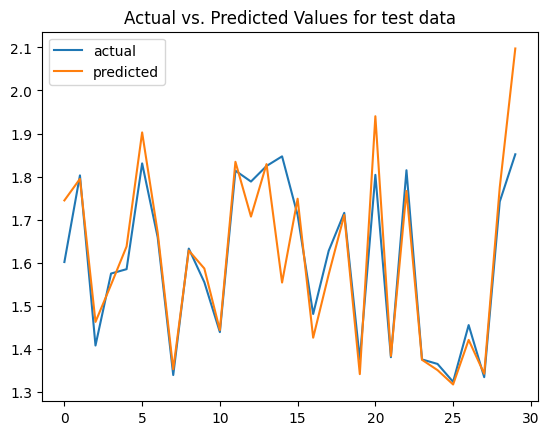

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Gaussian Process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF([1.0]*X_scaled.shape[1], (1e-2, 1e2))

# Create and fit the Gaussian Process Regressor
cgpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
cgpr_model.fit(X_train, y_train)

y_pred, sigma = cgpr_model.predict(X_test, return_std=True)

# Evaluate the model (you can use metrics like Mean Absolute Error, R-squared, etc.)
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(y_test,label='actual')
plt.plot(y_pred,label='predicted')
plt.title('Actual vs. Predicted Values for test data')
plt.legend()
plt.show()


Then, then prediction is done on a part of dataset. Starting from cycle 100 and the graph is plotted alng with the entire dataset.

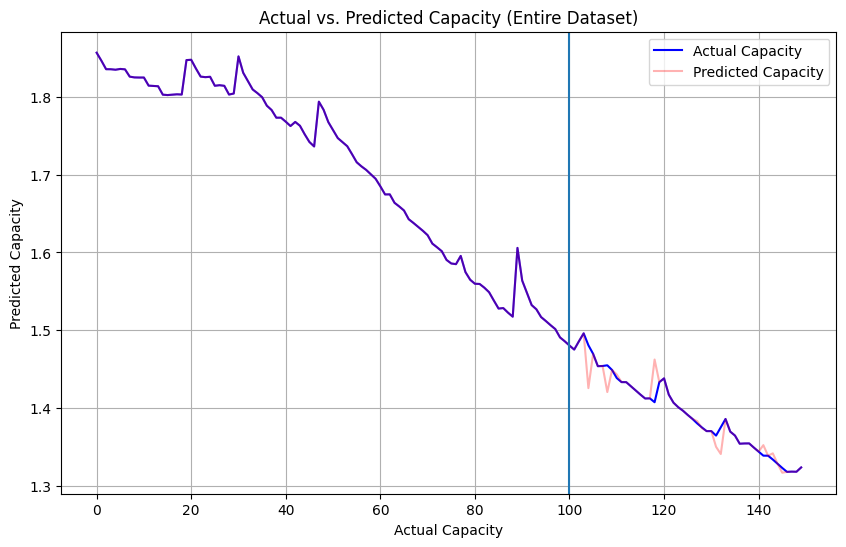

In [27]:
all_preds = cgpr_model.predict(scaler.transform(X[101:]))

cap=list(capacity_df.loc[:100,'Capacity'].values)
cap.extend(all_preds)
all_preds=cap

combined_df = pd.DataFrame({'Actual Capacity': capacity_df['Capacity'], 'Predicted Capacity': all_preds})

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Actual Capacity'], c='blue', label='Actual Capacity')
plt.plot(combined_df['Predicted Capacity'], c='red', alpha=0.3, label='Predicted Capacity')
plt.axvline(100)

plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Actual vs. Predicted Capacity (Entire Dataset)')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
combined_df['Predicted Capacity'].describe()

count    150.000000
mean       1.605149
std        0.182208
min        1.317064
25%        1.433408
50%        1.592948
75%        1.774356
max        2.097618
Name: Predicted Capacity, dtype: float64